In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from subprocess import check_output
print(check_output(["ls", "../MNIST_data/fashion_csv/"]).decode("utf8"))

fashion-mnist_test.csv
fashion-mnist_train.csv.tar.gz



In [2]:
from keras.utils import to_categorical
import gzip
import pandas as pd
import os


# 完整的csv格式的训练集太大, 无法上传至github, 因此保存压缩文件, 在此解压缩并写入同名csv.
train_file = gzip.GzipFile("../MNIST_data/fashion_csv/fashion-mnist_train.csv.tar.gz", "r")
with open("../MNIST_data/fashion_csv/fashion-mnist_train.csv", 'wb') as f:
    f.write(train_file.read())
data_train = pd.read_csv('../MNIST_data/fashion_csv/fashion-mnist_train.csv')
data_train = data_train.drop(index=len(data_train.iloc[:, 0])-1) # 不知为什么, 最后一行全为nan, 因此删去末行.
os.remove('../MNIST_data/fashion_csv/fashion-mnist_train.csv')
data_test = pd.read_csv('../MNIST_data/fashion_csv/fashion-mnist_test.csv')

Using TensorFlow backend.


In [3]:
X_train = np.array(data_train.iloc[:, 1:])
X_test = np.array(data_test.iloc[:, 1:])
y_train = to_categorical(np.array(data_train.iloc[:, 0]))
y_test = to_categorical(np.array(data_test.iloc[:, 0]))


img_rows, img_cols = 28, 28
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D

input_shape = (img_rows, img_cols, 1)
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam',
          loss='categorical_crossentropy',
          metrics=['accuracy'])

In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
__________

In [6]:
model.fit(X_train, y_train,
          batch_size=50,
          epochs=10,
          verbose=1,
          validation_data=(X_test, y_test))
score = model.evaluate(X_test, y_test, verbose=0)
model.save_weights('my_model_weights.h5')

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 53s 890us/step - loss: 0.6085 - acc: 0.7734 - val_loss: 0.3791 - val_acc: 0.8632
Epoch 2/10
60000/60000 [==============================] - 35s 591us/step - loss: 0.4072 - acc: 0.8512 - val_loss: 0.3055 - val_acc: 0.8890
Epoch 3/10
60000/60000 [==============================] - 35s 586us/step - loss: 0.3541 - acc: 0.8699 - val_loss: 0.2881 - val_acc: 0.8934
Epoch 4/10
60000/60000 [==============================] - 36s 592us/step - loss: 0.3279 - acc: 0.8802 - val_loss: 0.2569 - val_acc: 0.9045
Epoch 5/10
60000/60000 [==============================] - 34s 567us/step - loss: 0.3048 - acc: 0.8860 - val_loss: 0.2584 - val_acc: 0.9031
Epoch 6/10
60000/60000 [==============================] - 34s 566us/step - loss: 0.2945 - acc: 0.8910 - val_loss: 0.2674 - val_acc: 0.8966
Epoch 7/10
60000/60000 [==============================] - 36s 595us/step - loss: 0.2796 - acc: 0.8959 - val_loss: 0.

In [18]:
model.save("weights.h5")
load_model("weights.h5")

In [7]:
print('accuracy: ',score[1])
print('loss: ',score[0])

accuracy:  0.9154
loss:  0.221858507967


In [8]:
print(score)

[0.22185850796699524, 0.91539999999999999]


In [19]:
from keras.models import load_model
model_l = load_model(r"./weights.h5")
import read_image
data = read_image.Dataset()
# for i in range(130):
#     current_imgs = data.next_batch()
    

(6500, 28, 28, 1)
共6500张图片


In [23]:
data.images

array([[[[0],
         [0],
         [0],
         ..., 
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ..., 
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ..., 
         [0],
         [0],
         [0]],

        ..., 
        [[0],
         [0],
         [0],
         ..., 
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ..., 
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ..., 
         [0],
         [0],
         [0]]],


       [[[0],
         [0],
         [0],
         ..., 
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ..., 
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ..., 
         [0],
         [0],
         [0]],

        ..., 
        [[0],
         [0],
         [0],
         ..., 
    

In [35]:
prediction = model_l.predict(data.images)

In [40]:
with open("res.txt", "r+") as f:
    for i in range(prediction.shape[0]):
        f.write(str(np.argmax(prediction[i])))
        if i != 6499:
            f.write("\n")

In [28]:
for i in res:
    print(i)

[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
[  1.00000000e+00   0.00000000e+00   0.00000000e+00   1.44683981e-36
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00]
[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
[  1.08475177e-32   2.36616771e-21   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   1.00000000e+00   0.00000000e+00]
[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.          0.          0.          0.00403136  0.9959687   0.          0.
  0.          0.          0.        ]
[  3.48290452e-17   0.00000000e+00   0.00000000e+00   1.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00]
[ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0

[ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
[ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
[  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   5.65065849e-25
   0.00000000e+00   1.00000000e+00]
[ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
[ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
[  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   1.00000000e+00   0.00000000e+00   2.26055526e-27   0.00000000e+00
   0.00000000e+00   0.00000000e+00]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
[  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00
   0.00000000e+00   0.00000000e+00   

[ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[  0.00000000e+00   0.00000000e+00   9.99999523e-01   0.00000000e+00
   0.00000000e+00   0.00000000e+00   4.67642366e-07   0.00000000e+00
   0.00000000e+00   0.00000000e+00]
[ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
[  0.00000000e+00   0.00000000e+00   1.99394602e-25   0.00000000e+00
   1.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00]
[ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
[ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
[ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
[  1.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   1.09840293e-14   0.00000000e+00
   0.00000000e+00   0.00000000e+00]
[ 0.  1.  0.  0.

[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
[  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00
   0.00000000e+00   0.00000000e+00   1.18006559e-36   0.00000000e+00
   0.00000000e+00   0.00000000e+00]
[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
[  0.00000000e+00   0.00000000e+00   1.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   5.09887629e-16   0.00000000e+00
   0.00000000e+00   0.00000000e+00]
[ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
[ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
[  3.88739578e-13   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   1.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00]
[ 0.          0.09317398  0.          0.90682608  0.          0.          0.
  0.          0.          0.        ]
[ 0.  0.  0.  0.  0.  1.  0

[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
[  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   3.93684506e-24   0.00000000e+00   1.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00]
[ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
[  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   6.59999347e-32
   0.00000000e+00   1.00000000e+00]
[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
[ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
[ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
[ 0.  0.  0.  0.  0.  

[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
[  0.00000000e+00   0.00000000e+00   1.08213145e-32   0.00000000e+00
   1.00000000e+00   0.00000000e+00   2.63928627e-15   0.00000000e+00
   0.00000000e+00   0.00000000e+00]
[ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
[ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
[  3.50566552e-06   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   9.99996543e-01   0.00000000e+00
   0.00000000e+00   0.00000000e+00]
[ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
[  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   1.00000000e+00   0.00000000e+00   4.75305937e-22   0.00000000e+00
   0.00000000e+00   0.00000000e+00]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
[  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e

[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
[  0.00000000e+00   0.00000000e+00   5.80291012e-27   0.00000000e+00
   0.00000000e+00   0.00000000e+00   1.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00]
[ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
[  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   1.00000000e+00   0.00000000e+00   7.65619294e-30
   0.00000000e+00   0.00000000e+00]
[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
[  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
[  0.00000000e+00   0.00000000e+00   0.00000000e+00   6.41351055e-21
   1.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00]
[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
[  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00
   0.00000000e+00   1.44031112e-25]
[ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
[  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   4.41063959e-31   0.00000000e+00   1.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00]
[ 0.  0.  0.  0.

[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
[  1.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   9.21126162e-18   0.00000000e+00
   0.00000000e+00   0.00000000e+00]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
[  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   2.25550432e-15   0.00000000e+00   1.00000000e+00
   0.00000000e+00   0.00000000e+00]
[ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
[ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
[ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  1.  0.  

[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
[  1.91305139e-06   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   9.99998093e-01   0.00000000e+00
   0.00000000e+00   0.00000000e+00]
[ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
[  2.10785670e-20   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   1.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00]
[ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
[  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   1.31436148e-20   0.00000000e+00   1.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00]
[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.

[ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
[  0.00000000e+00   0.00000000e+00   1.28143046e-25   0.00000000e+00
   0.00000000e+00   0.00000000e+00   1.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.

[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
[ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
[ 0.          0.          0.00556404  0.          0.          0.
  0.99443591  0.          0.          0.        ]
[ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   2.06459163e-06   0.00000000e+00   9.99997973e-01   0.00000000e+00
   0.00000000e+00   0.00000000e+00]
[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
[  0.00000000e+00   0.00000000e+00   0.

[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
[  1.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   2.17109651e-26   0.00000000e+00
   0.00000000e+00   0.00000000e+00]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[  1.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   1.29933386e-31   0.00000000e+00
   0.00000000e+00   0.00000000e+00]
[ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
[ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
[ 0.          0.          0.5196051   0.          0.          0.

[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
[  0.00000000e+00   0.00000000e+00   1.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   7.65446562e-31   0.00000000e+00
   0.00000000e+00   0.00000000e+00]
[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
[ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
[  0.00000000e+00   1.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   3.23576143e-35   0.00000000e+00]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
[  1.00000000e+00   0.00000000e+00   0.00000000e+00   6.52925858e-22
   0.00000000e+00   0.00000000e+00   1.10954176e-14   0.00000000e+00
   0.00000000e+00   0.00000000e+00]
[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.

[ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
[ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
[ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
[  9.99999523e-01   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   4.69365204e-07   0.00000000e+00
   0.00000000e+00   0.00000000e+00]
[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
[ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
[  0.00000000e+00   0.00000000e+00   5.27706307e-12   0.00000000e+00
   1.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00]
[  1.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   

In [29]:
res.shape

(6500, 10)

In [47]:
np.squeeze(data.images).shape

(6500, 28, 28)

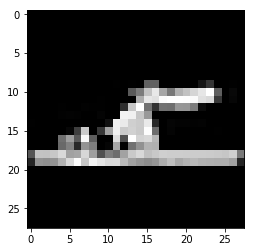

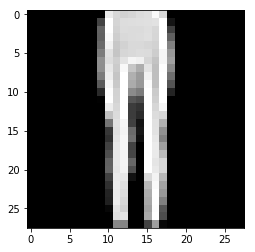

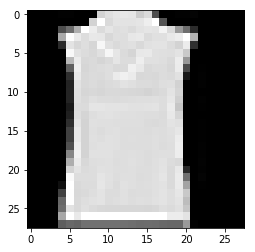

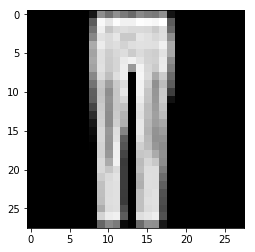

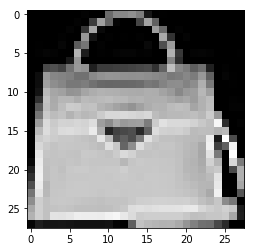

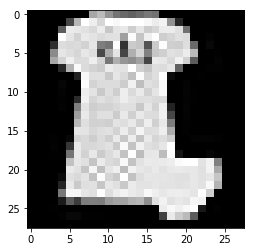

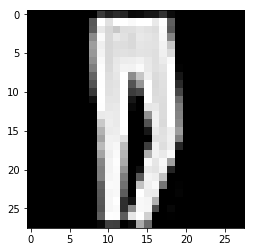

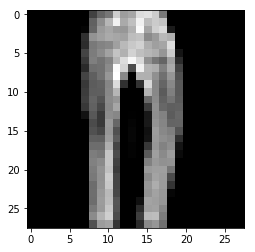

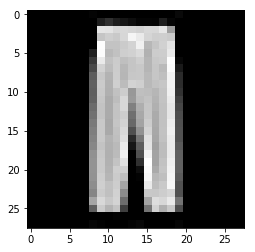

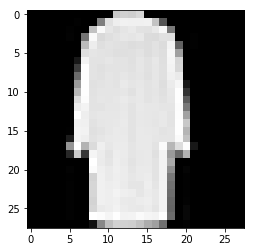

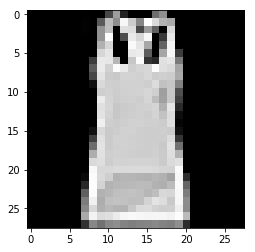

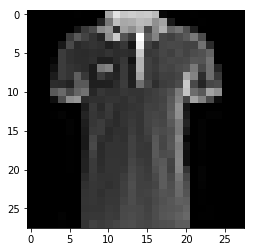

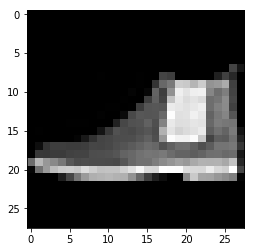

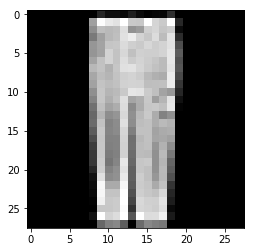

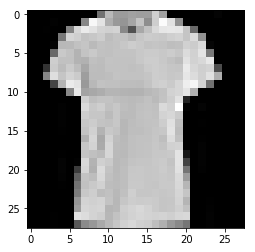

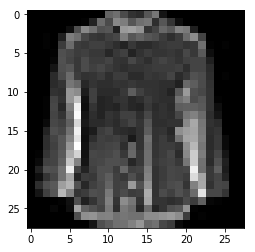

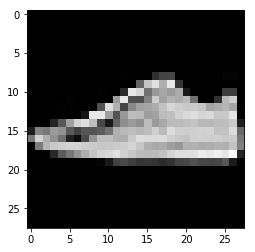

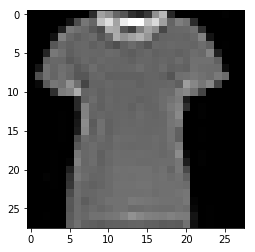

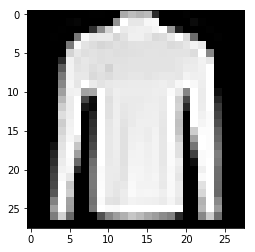

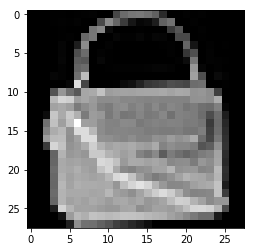

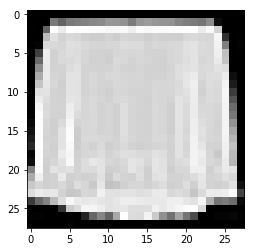

KeyboardInterrupt: 

In [48]:
import matplotlib.pyplot as plt
for i in np.squeeze(data.images):
    plt.imshow(i, cmap="gray")
    plt.show()